In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
df = pd.read_json("011_results.jsonl", orient="records", lines=True).drop_duplicates(subset=["eval_file", "clip_seconds"])
df["accuracy"] = df.apply(lambda row: accuracy_score(row["y_true"], row["y_pred"]), axis=1)
df["macroF1"] = df.apply(lambda row: f1_score(row["y_true"], row["y_pred"], average="macro"), axis=1)
df.tail()

,output_column,model_name_or_path,eval_file,clip_seconds,y_true,y_pred,train_config,accuracy,macroF1
5,Speaker_name,models/facebook_wav2vec2-large-960h-lv60-self_...,003_speaker_id_test_for_datasets.csv,2,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Lalovac, Boris, Đuj...",None,0.106,0.047947
6,Speaker_name,models/facebook_wav2vec2-large-960h-lv60-self_...,003_speaker_id_dev_for_datasets.csv,-1,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Jovanović, Željko, Jovanović, Željko, Jovanov...",None,0.316,0.255417
7,Speaker_name,models/facebook_wav2vec2-large-960h-lv60-self_...,003_speaker_id_test_for_datasets.csv,-1,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Jovanović, Željko, Jovanović, Željko, Jovanov...",None,0.334,0.274969
8,Speaker_age_group,models/facebook_wav2vec2-large-960h-lv60-self_...,006_age_dev.csv,-1,"[old, old, old, old, old, old, old, old, old, ...","[young, young, young, young, young, young, you...",{'model_name_or_path': 'facebook/wav2vec2-larg...,0.716,0.708729
9,Speaker_age_group,models/facebook_wav2vec2-large-960h-lv60-self_...,006_age_test.csv,-1,"[old, old, old, old, old, old, old, old, old, ...","[old, young, young, old, old, young, young, yo...",{'model_name_or_path': 'facebook/wav2vec2-larg...,0.678,0.672112


In [2]:
subset = df.loc[df.output_column=="Speaker_gender", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean()

# print(subset.to_latex())
# print("\n\n\n")
print(subset.to_markdown())
subset

|                             |   accuracy |   macroF1 |
|:----------------------------|-----------:|----------:|
| ('001_gender_dev.csv', -1)  |     1      |    1      |
| ('001_gender_dev.csv', 2)   |     0.997  |    0.997  |
| ('001_gender_test.csv', -1) |     0.999  |    0.999  |
| ('001_gender_test.csv', 2)  |     0.9935 |    0.9935 |


accuracy  macroF1
eval_file           clip_seconds                   
001_gender_dev.csv  -1              1.0000   1.0000
                     2              0.9970   0.9970
001_gender_test.csv -1              0.9990   0.9990
                     2              0.9935   0.9935

In [3]:
subset = df.loc[df.output_column=="Speaker_name", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean()

#print(subset.to_latex())
# print("\n\n\n")
print(subset.to_markdown())
subset

|                                              |   accuracy |   macroF1 |
|:---------------------------------------------|-----------:|----------:|
| ('003_speaker_id_dev_for_datasets.csv', -1)  |      0.316 | 0.255417  |
| ('003_speaker_id_dev_for_datasets.csv', 2)   |      0.14  | 0.0799439 |
| ('003_speaker_id_test_for_datasets.csv', -1) |      0.334 | 0.274969  |
| ('003_speaker_id_test_for_datasets.csv', 2)  |      0.106 | 0.0479471 |


accuracy   macroF1
eval_file                            clip_seconds                    
003_speaker_id_dev_for_datasets.csv  -1               0.316  0.255417
                                      2               0.140  0.079944
003_speaker_id_test_for_datasets.csv -1               0.334  0.274969
                                      2               0.106  0.047947

In [4]:
df.loc[df.output_column=="Speaker_name",:]

,output_column,model_name_or_path,eval_file,clip_seconds,y_true,y_pred,train_config,accuracy,macroF1
4,Speaker_name,models/facebook_wav2vec2-large-960h-lv60-self_...,003_speaker_id_dev_for_datasets.csv,2,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...",None,0.140,0.079944
5,Speaker_name,models/facebook_wav2vec2-large-960h-lv60-self_...,003_speaker_id_test_for_datasets.csv,2,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Lalovac, Boris, Đuj...",None,0.106,0.047947
6,Speaker_name,models/facebook_wav2vec2-large-960h-lv60-self_...,003_speaker_id_dev_for_datasets.csv,-1,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Jovanović, Željko, Jovanović, Željko, Jovanov...",None,0.316,0.255417
7,Speaker_name,models/facebook_wav2vec2-large-960h-lv60-self_...,003_speaker_id_test_for_datasets.csv,-1,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Jovanović, Željko, Jovanović, Željko, Jovanov...",None,0.334,0.274969


In [28]:
y_true, y_pred = df.loc[5, ["y_true", "y_pred"]]


In [29]:
df.loc[5, :]

output_column                                              Speaker_name
model_name_or_path    models/facebook_wav2vec2-large-960h-lv60-self_...
eval_file                          003_speaker_id_test_for_datasets.csv
clip_seconds                                                          2
y_true                [Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...
y_pred                [Đujić, Saša, Đujić, Saša, Lalovac, Boris, Đuj...
train_config                                                       None
accuracy                                                          0.106
macroF1                                                       0.0479471
Name: 5, dtype: object

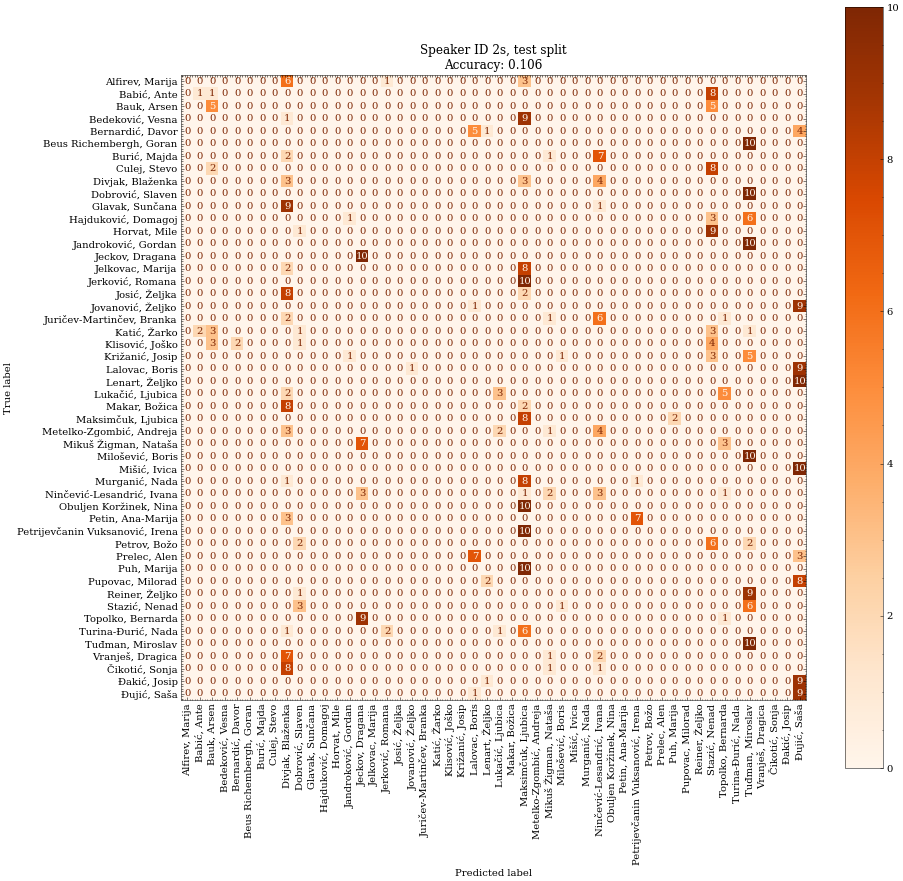

In [31]:
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(14,14))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=90)
plt.title("Speaker ID 2s, test split\nAccuracy: 0.106")
plt.savefig("images/011_cm_speaker_id_test.png")
plt.savefig("images/011_cm_speaker_id_test.pdf")
plt.show()

In [30]:
subset = df.loc[df.output_column=="Speaker_age_group", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean()
# print(subset.to_latex())
# print("\n\n\n")
print(subset.to_markdown())
subset

|                          |   accuracy |   macroF1 |
|:-------------------------|-----------:|----------:|
| ('006_age_dev.csv', -1)  |      0.716 |  0.708729 |
| ('006_age_test.csv', -1) |      0.678 |  0.672112 |


,,accuracy,macroF1
eval_file,clip_seconds,,
006_age_dev.csv,-1,0.716,0.708729
006_age_test.csv,-1,0.678,0.672112


In [14]:
df.loc[3, :]

output_column                                            Speaker_gender
model_name_or_path    models/facebook_wav2vec2-large-960h-lv60-self_...
eval_file                                           001_gender_test.csv
clip_seconds                                                          2
y_true                [F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...
y_pred                [F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...
train_config                                                       None
accuracy                                                         0.9935
macroF1                                                          0.9935
Name: 3, dtype: object

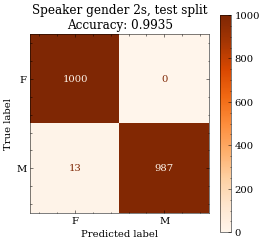

In [32]:
y_true, y_pred = df.loc[3, ["y_true", "y_pred"]]
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
plt.title("Speaker gender 2s, test split\nAccuracy: 0.9935")
plt.savefig("images/011_cm_speaker_gender_test.png")
plt.savefig("images/011_cm_speaker_gender_test.pdf")
plt.show()

In [16]:
df.loc[9, :]

output_column                                         Speaker_age_group
model_name_or_path    models/facebook_wav2vec2-large-960h-lv60-self_...
eval_file                                              006_age_test.csv
clip_seconds                                                         -1
y_true                [old, old, old, old, old, old, old, old, old, ...
y_pred                [old, young, young, old, old, young, young, yo...
train_config          {'model_name_or_path': 'facebook/wav2vec2-larg...
accuracy                                                          0.678
macroF1                                                        0.672112
Name: 9, dtype: object

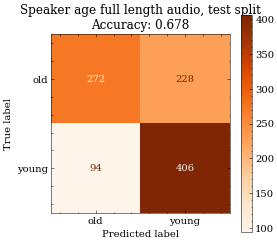

In [33]:
y_true, y_pred = df.loc[9, ["y_true", "y_pred"]]
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
plt.title("Speaker age full length audio, test split\nAccuracy: 0.678")
plt.savefig("images/011_cm_speaker_age_test.png")
plt.savefig("images/011_cm_speaker_age_test.pdf")
plt.show()

In [18]:
test = pd.read_csv(df.loc[9, "eval_file"])

test["y_pred"] = df.loc[9, "y_pred"]
test["y_true"] = df.loc[9, "y_true"]
test["missclassified"] = test.y_pred != test.y_true

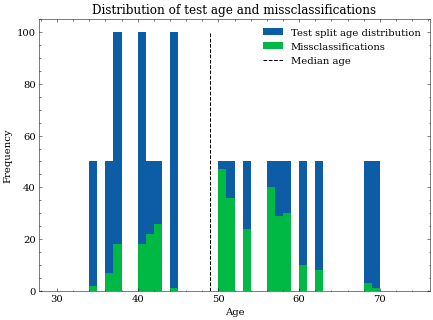

In [19]:
fig, ax = plt.subplots(figsize=(7, 5))
r = range(30, 75, 1)

test.Speaker_age_at_recording.plot.hist(bins=r, ax=ax, label="Test split age distribution")
test.Speaker_age_at_recording[test.missclassified].plot.hist(bins=r, ax=ax, label="Missclassifications")
ax.vlines(49, 0, 100, linestyles="dashed", label="Median age")
plt.legend()
plt.xlabel("Age")
plt.title("Distribution of test age and missclassifications")

fname = "images/011_age_missclassifications_histogram"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()


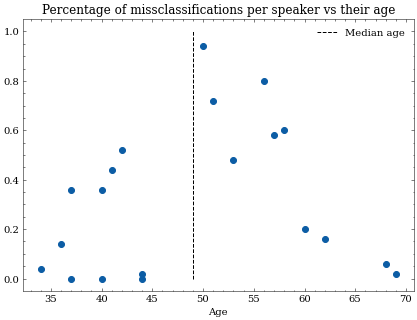

In [20]:
gb = test.groupby("Speaker_name").agg({
    "missclassified": lambda i: sum(i) / len(i),
    "Speaker_age_at_recording": "median"
    })

x = gb.Speaker_age_at_recording
y = gb.missclassified


fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x,y)
ax.vlines(49, 0, 1, linestyles="dashed", label="Median age")
ax.set_xlabel("Age")
plt.legend()
ax.set_title("Percentage of missclassifications per speaker vs their age")

fname = "images/011_age_missclassifications_percentages_scatter"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()


In [34]:
test.columns

Index(['Speaker_name', 'Count', 'Speaker_age_at_recording', 'Speaker_gender',
       'Speaker_age_group', 'path', 'y_pred', 'y_true', 'missclassified'],
      dtype='object')

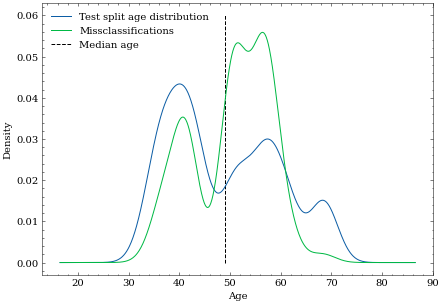

In [22]:
fig, ax = plt.subplots(figsize=(7, 5))
r = range(30, 75, 1)

test.Speaker_age_at_recording.plot.kde(
    # bins=r, 
    ax=ax, 
    label="Test split age distribution"
    )
test.Speaker_age_at_recording[test.missclassified].plot.kde(
    # bins=r, 
    ax=ax, 
    label="Missclassifications"
    )
ax.vlines(49, 0, 0.06, linestyles="dashed", label="Median age")
plt.legend()
plt.xlabel("Age")
plt.show()


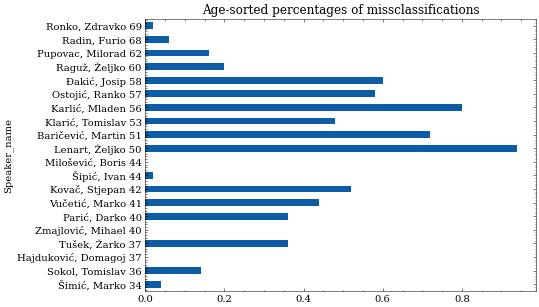

In [23]:
new_names = test.Speaker_name+" "+ test.Speaker_age_at_recording.astype(int).astype(str)
gb = test.assign(Speaker_name=new_names).groupby("Speaker_name").agg({
    "missclassified": lambda i: sum(i) / len(i),
    "Speaker_age_at_recording": "median"
    }).sort_values("Speaker_age_at_recording", ascending=True)
gb

x = gb.missclassified
y = gb.index


fig, ax = plt.subplots(figsize=(7, 5))

gb.missclassified.plot.barh(ax=ax)

plt.title("Age-sorted percentages of missclassifications")

fname = "images/011_age_missclassifications_percentages_by_speaker_barh"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()

# Compending a One-in-All latex table:

In [4]:
df.head(2)

,output_column,model_name_or_path,eval_file,clip_seconds,y_true,y_pred,train_config,accuracy,macroF1
0,Speaker_gender,models/facebook_wav2vec2-large-960h-lv60-self_...,001_gender_dev.csv,-1,"[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...",None,1.000,1.000
1,Speaker_gender,models/facebook_wav2vec2-large-960h-lv60-self_...,001_gender_test.csv,-1,"[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...",None,0.999,0.999


In [12]:
df["eval_on_test"] = df.eval_file.str.contains("test")
only_test = df[df.eval_on_test]
only_test = only_test.loc[:, ["output_column", "clip_seconds", "accuracy", "macroF1"]]
print(only_test.to_latex(
    float_format="{:0.4f}".format
))

\begin{tabular}{llrrr}
\toprule
{} &      output\_column &  clip\_seconds &  accuracy &  macroF1 \\
\midrule
1 &     Speaker\_gender &            -1 &    0.9990 &   0.9990 \\
3 &     Speaker\_gender &             2 &    0.9935 &   0.9935 \\
5 &       Speaker\_name &             2 &    0.1060 &   0.0479 \\
7 &       Speaker\_name &            -1 &    0.3340 &   0.2750 \\
9 &  Speaker\_age\_group &            -1 &    0.6780 &   0.6721 \\
\bottomrule
\end{tabular}

